# Practicing Image Transforms & Histograms from Chapter 3 of Woods


I make no attempt to implement the many aspects shown in the book, but rather focus on their application. 

#Basic Setup

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

#collab patch for imshow:
from google.colab.patches import cv2_imshow as imshow
DIR = '/content/drive/MyDrive/DIP/'
IMG = 'PaprikaMovie.jpg'

Input Image Shape: (720, 1280, 3)
Resized Image Shape: (360, 640, 3)
Grey Image Shape: (360, 640)


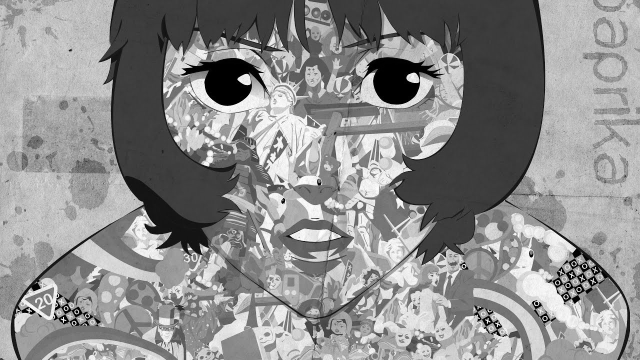

In [ ]:
img = cv2.imread(DIR+IMG)
shp = img.shape
print('Input Image Shape:', shp)

#Resize image to make it nicer when printing
img = cv2.resize(img, (640,360) )
print('Resized Image Shape:', img.shape)

#Greyscale to make following operations easier to handle
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('Grey Image Shape:', img.shape)

#Show the image
imshow(img)

## Convolution

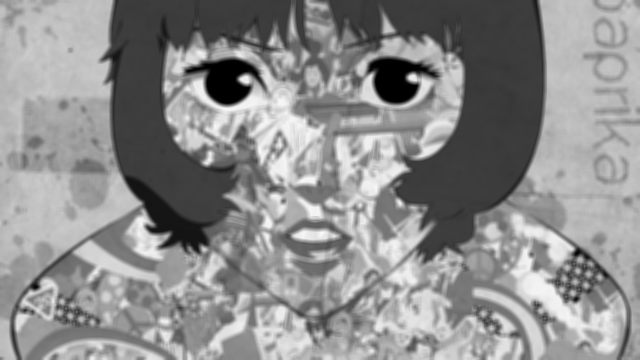

In [ ]:
#Convolution (actually correllation in the docs, but oh well)
blur = np.ones((5,5))/25

blurred = cv2.filter2D(img, 0, blur)

imshow(blurred)

## Borders

Different Borders
constant


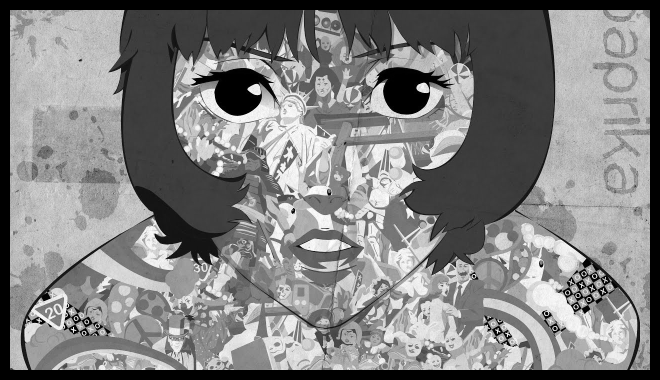

Reflect


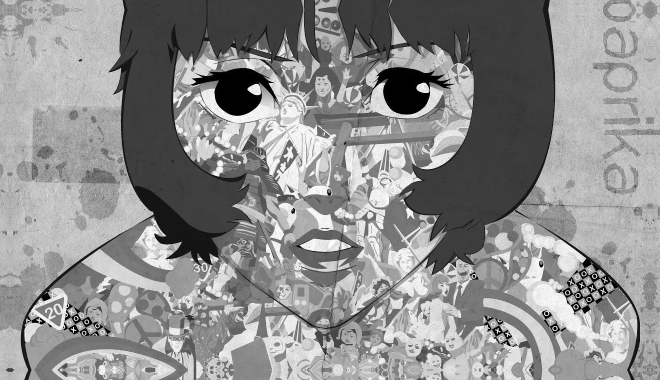

Wrap


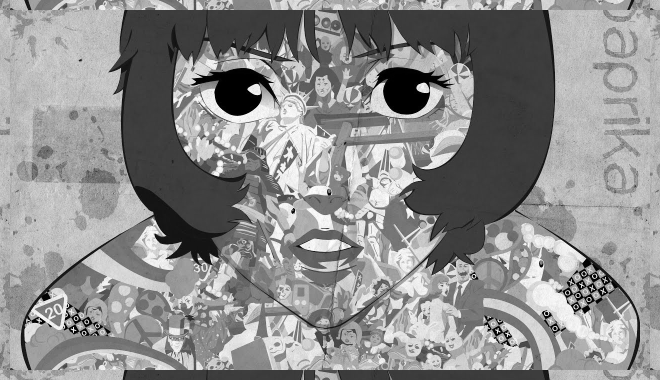

Replicate


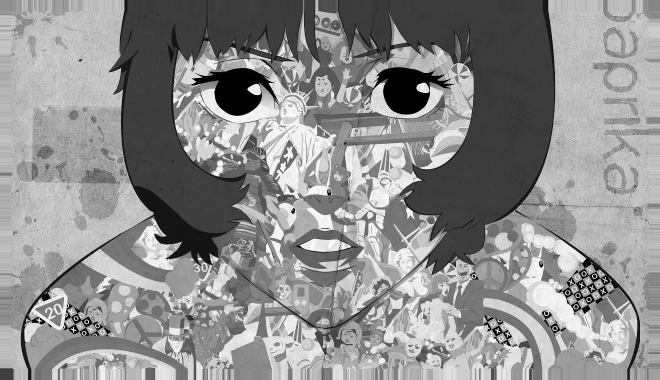

Reflect 101


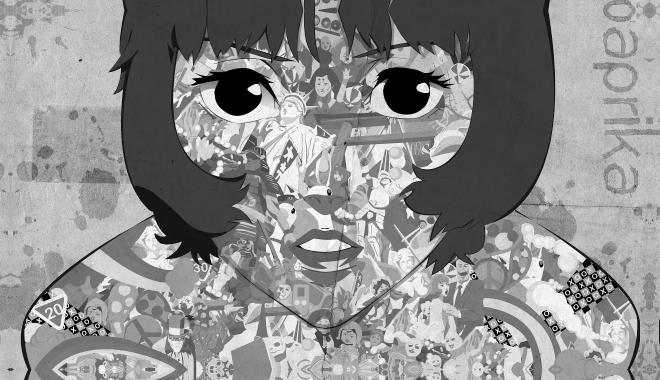

Isolated


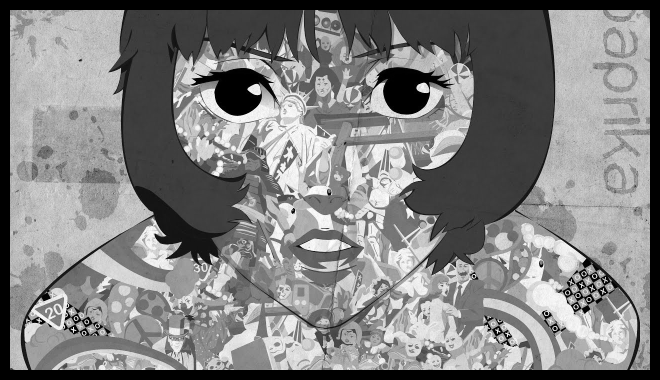

In [ ]:
#Making an image border

print('Different Borders')
#Border Types
print('constant')
imshow(cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT ))

print('Reflect')
imshow(cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_REFLECT ))

print('Wrap')
imshow(cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_WRAP ))

print('Replicate')
imshow(cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_REPLICATE ))


print('Reflect 101')
imshow(cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_REFLECT_101 ))

print('Isolated')
imshow(cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_ISOLATED ))


## Derivative-like

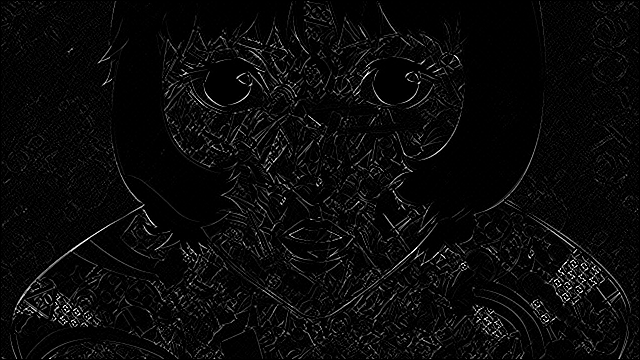

In [ ]:
#Sobel Derivative
imshow(cv2.Sobel(img, 0, 1, 1, 3))

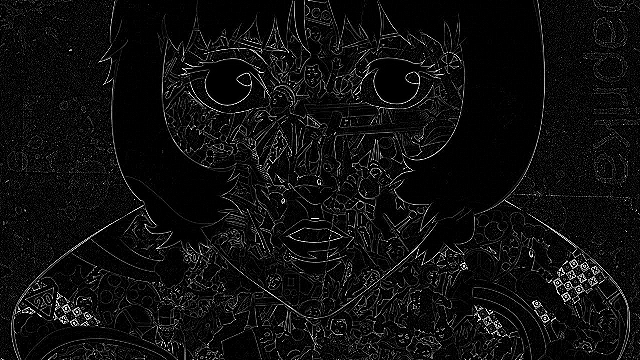

In [ ]:
#Laplace
imshow(cv2.Laplacian(img, 0))

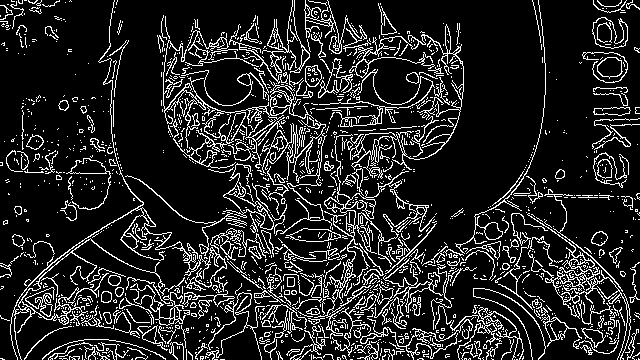

In [ ]:
#Canny
imshow(cv2.Canny(img, 120, 128))

##Transforms

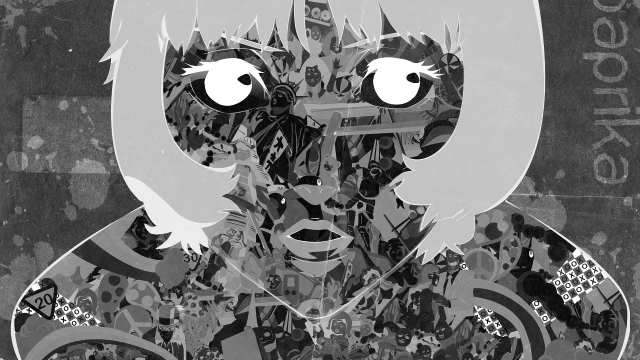

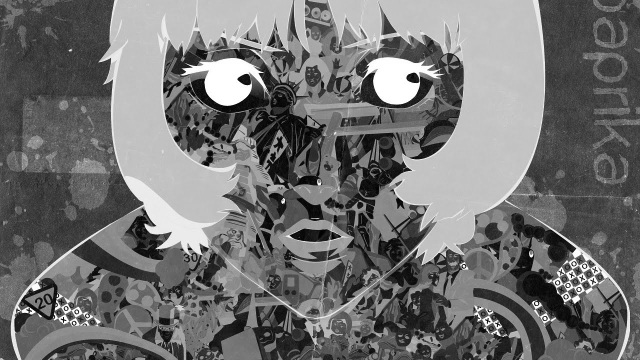

In [ ]:
#Negatives 2 ways

#Based on bits per pixel
imshow(256-img)

#opencv way
imshow(cv2.bitwise_not(img))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


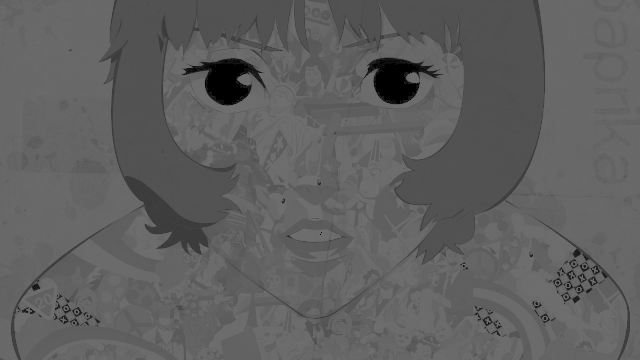

In [ ]:
#Log transform 
C = 20
logged = C*np.log(1+img)
imshow(logged)

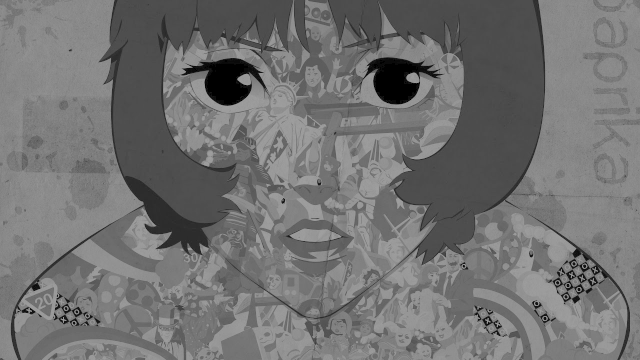

In [ ]:
#Power-Law
def Power_law(img, c, gamma = 1):
  return c*img**gamma

imshow(Power_law(img, 10, 0.5))

## Histograms

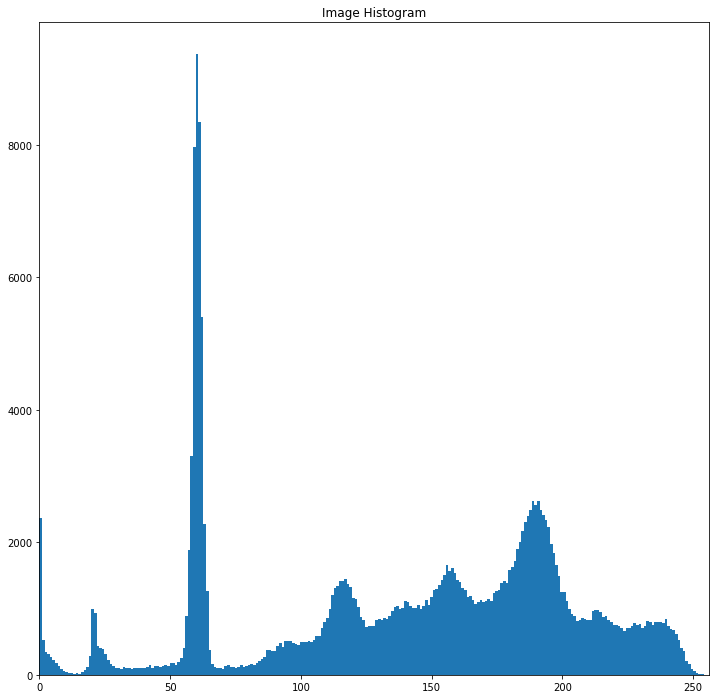

In [ ]:
plt.figure(figsize=(12, 12))
plt.hist(img.flatten(), bins = 256)
plt.xlim(0, 256)
plt.title('Image Histogram')
plt.show()

Original Image


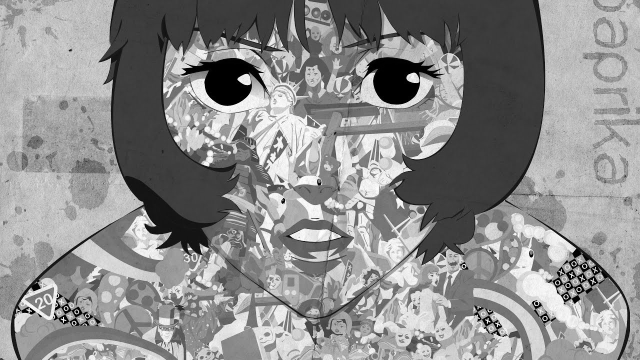

Image After Hist. Equalization


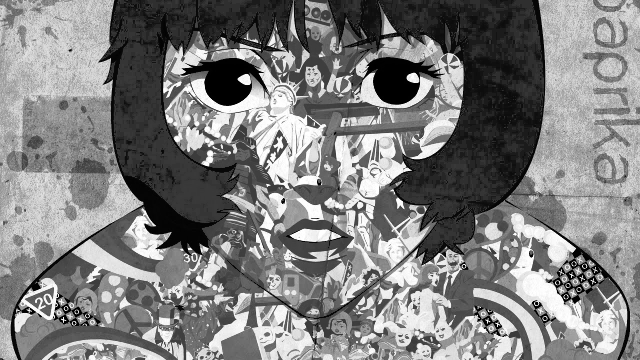

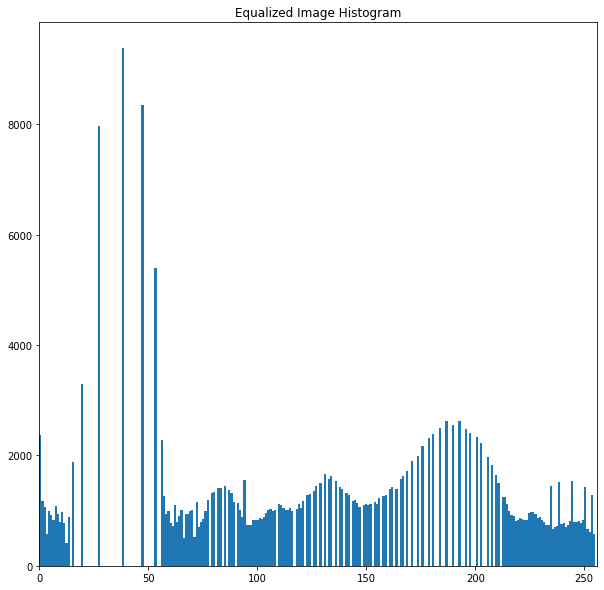

In [ ]:
#Histogram Equalization
img_eq = cv2.equalizeHist(img)

print('Original Image')
imshow(img)
print('Image After Hist. Equalization')
imshow(img_eq)

plt.figure(figsize=(10,10))
plt.hist(img_eq.flatten(), bins = 256)
plt.xlim(0, 256)
plt.title('Equalized Image Histogram')
plt.show()

## More Filtering

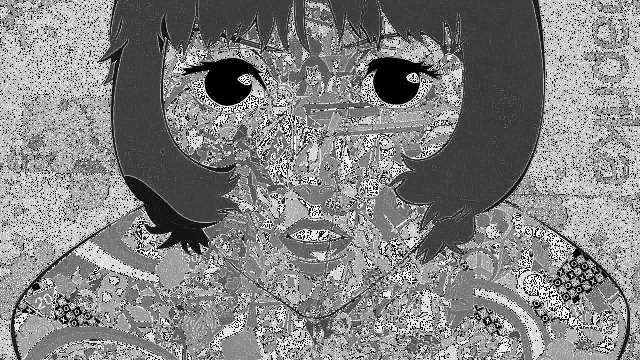

In [ ]:

#Sharpening
C = 1
kernel = -np.ones((3,3))
kernel[1,1] = 8
filtered = img + C*cv2.filter2D(img, 0, kernel)
imshow(filtered)

In [ ]:
np.mean(filtered)

131.41133680555555